In [4]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [95]:
# np.sum does column wise thing
# h = 1/(1+e^-XTheta)
# J = sum(-log(h)y-log(1-h)(1-y))/m
# delJ is checked to be sum(x*(h-y))/m

def sigmoid(z):  
    return  1/(1+np.exp(-z))
#     return np.array(map(float,list(map(lambda x:1/(1+(np.e)**(-x)) , z))))
def calcCost(m,h,y):
    J = np.sum(np.log(h)*y + np.log(1-h)*(1-y))/m*-1
    return J


1.00089421412
1.00082876333
1.00076813391
1.00071197193
1.00065994929
1.00061176183
1.00056712761
1.00052578532
1.00048749276
1.00045202548
1.00041917546
1.00038874994
1.00036057033
1.00033447111
1.00031029895
1.00028791177
1.00026717795
1.00024797553
1.00023019154
1.00021372132
1.00019846792
1.00018434152
1.00017125892
1.00015914307
1.00014792258
1.00013753133
1.00012790806
1.00011899606
1.00011074277
1.00010309954
1.00009602129
1.00008946627
1.00008339581
1.00007777412
1.00007256801
1.00006774677
1.00006328195
1.00005914721
1.00005531815
1.00005177216
1.00004848832
1.00004544725
1.000042631
1.00004002294
1.00003760768
1.00003537096
1.00003329958
1.00003138132
1.00002960484
1.00002795967
1.0000264361
1.00002502512
1.00002371842
1.00002250828
1.00002138756
1.00002034964
1.00001938841
1.00001849818
1.00001767371
1.00001691013
1.00001620294
1.00001554797
1.00001494136
1.00001437952
1.00001385915
1.00001337717
1.00001293076
1.00001251727
1.00001213428
1.00001177952
1.00001145091
1.0000111

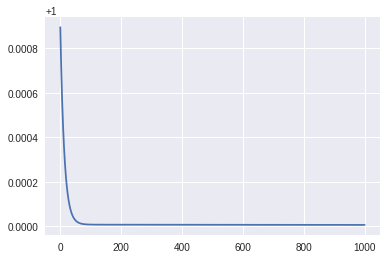

In [97]:
def getCost(h,y):
    return np.sum( (h-y)**2 )

class Perceptron(object):
    def __init__(self,alpha=0.01,iters=50,N_h=2,weight1=[-1],weight2=[-1]):
        self.alpha=alpha
        self.iters=iters
        self.N_h=N_h
        self.weight1=weight1
        self.weight2=weight2
    
    def train(self,x,y):
        X=x.copy()
        m,n=X.shape
        N_h=self.N_h
        X =np.insert(X,0,1,axis=1) # insert the column of ones

        self.J_hist=[]
        self.weight1 = np.random.randn(n+1,N_h)*0.1 #N+1 x N_h = 3 x 2
        self.weight2 = np.random.randn(N_h+1,1)*0.1 #N_h+1 x 1 = 3 x 1
        for _ in range(self.iters):
            # ForwardProp
            X_h = self.getH0(X)
            X_h =np.insert(X_h,0,1,axis=1) # insert the column of ones
            h = self.getH(X_h)
            j=getCost(h,y)
            print(j)
            self.J_hist.append(j)
            # BackProp - grad in Left to right order
            # deltaLayer2 is 4 x 3
            # weight2 is 3x1
            # X_h is 4x3 with the bias
            deltaLayer2 = np.multiply( np.subtract(h,y) ,np.multiply(h,1-h))
            #inputs are coeffs -
            deltaW2 = np.matmul(X_h.T, deltaLayer2)  # shud be of dim of W2
            #weights are coeffs -
            deltaLayer1 = np.matmul(deltaLayer2,self.weight2.T) # 4x3
            #out(1-out) -
            deltaLayer1 = np.multiply( deltaLayer1 ,np.multiply(X_h,1-X_h))
            #remove the bias column
            deltaLayer1 = np.delete(deltaLayer1,[0],axis=1)#deltaLayer1[:,1:] 
            #inputs are coeffs -
            deltaW1 = np.matmul(X.T ,deltaLayer1)
            #update at the end of iter
            self.weight2= self.weight2 - (self.alpha/m) * deltaW2
            self.weight1= self.weight1 - (self.alpha/m) * deltaW1
            
 
    def predict(self,x):
        X=x.copy()
        X =np.insert(X,0,1,axis=1) # insert the column
        X_h = self.getH0(X)
        X_h =np.insert(X_h,0,1,axis=1) # insert the column of ones
        h=self.getH(X_h)
        return h# np.array([1 if hi>=0.5 else 0 for hi in h])
    
    def getH0(self,X):
        return  sigmoid(np.matmul(X,self.weight1))
    
    def getH(self,X_h):
        return  sigmoid(np.matmul(X_h,self.weight2))

pp = Perceptron(alpha=0.1,iters=1000)
X= np.array([[0,0],[1,0],[0,1],[1,1],])
y = np.array([ 0,    1,    1,    0,]).reshape((4,1))
pp.train(X,y)
print(pp.weight1,pp.weight2)
plt.plot(pp.J_hist)
print('cost',pp.J_hist[-1])
m,n=X.shape
# X=np.random.permutation(X)
p=pp.predict(X).reshape((4,1))
print(np.concatenate( [X,p],axis=1))

